# Data anaylsis in cerebellar granular layer simulations
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
sys.path.insert(1,'./src')

Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCGrC/SimulationConfigGranular.cfg'
simulation_time = 50.0
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Initialize the simulation

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['network']['length'] = 1.0e-1
simulation.config_options['mfgrcsynapsis']['average_number_of_source_cells'] = 20
simulation.config_options['mfgrcsynapsis']['random_min_weight'] = 3.1e-9
simulation.config_options['mfgrcsynapsis']['random_max_weight'] = 3.1e-9
simulation.initialize()

2016-04-25 10:43:52,797 - P8730 - Simulation - DEBUG: Simulation time fixed to 50.0s
2016-04-25 10:43:52,798 - P8730 - Simulation - DEBUG: Creating cerebellum generator
2016-04-25 10:43:52,899 - P8730 - Simulation - DEBUG: Initializing cerebellum generator
2016-04-25 10:43:52,900 - P8730 - Simulation - DEBUG: Cerebellar simulation initialized
2016-04-25 10:43:52,909 - P8730 - Simulation - DEBUG: NEST module loaded
2016-04-25 10:43:52,931 - P8730 - Simulation - DEBUG: Setting Global NEST Seed: 123469
2016-04-25 10:43:52,932 - P8730 - Simulation - DEBUG: Setting Per-Process NEST Seeds: [123470, 123471, 123472, 123473, 123474, 123475, 123476, 123477, 123478, 123479, 123480, 123481]
2016-04-25 10:43:52,954 - P8730 - Simulation - WARNING: Non-specified cell model parameter: tau_minus in layer mflayer. Using default value
2016-04-25 10:43:52,956 - P8730 - Simulation - WARNING: Non-specified number of neurons in layer mflayer
2016-04-25 10:43:52,957 - P8730 - Simulation - WARNING: Non-specifi

./src/SpikingSimulation/SpikingCerebellum/SynapticLayerNoMPI.py:486: RuntimeWarning: invalid value encountered in divide


2016-04-25 10:43:53,550 - P8730 - Simulation - WARNING: Unrecognized parameter max_weight in layer gocgocsynapsis


/opt/nest/nest2.10/nompi/lib/python2.7/site-packages/nest/lib/hl_api_helper.py:61: UserWarning: 
OneToOneConnect is deprecated and will be removed in a future version of NEST.
Please use Connect instead!
For details, see http://www.nest-simulator.org/connection_management                       


2016-04-25 10:43:54,924 - P8730 - Simulation - DEBUG: Nest Process: 0. Connections created in layer mfgrcsynapsis: 78367
2016-04-25 10:43:54,964 - P8730 - Simulation - DEBUG: Nest Process: 0. Connections created in layer mfgocsynapsis: 1955
2016-04-25 10:43:55,689 - P8730 - Simulation - DEBUG: Nest Process: 0. Connections created in layer grcgocsynapsis: 35902
2016-04-25 10:43:55,772 - P8730 - Simulation - DEBUG: Nest Process: 0. Connections created in layer gocgrcsynapsis: 4174
2016-04-25 10:43:55,774 - P8730 - Simulation - DEBUG: Nest Process: 0. Connections created in layer gocgocsynapsis: 81
2016-04-25 10:43:57,016 - P8730 - Simulation - DEBUG: Creating AC Current generator
2016-04-25 10:43:57,017 - P8730 - Simulation - DEBUG: Creating DC Current generator
2016-04-25 10:43:57,059 - P8730 - Simulation - DEBUG: Normalization on iteration 10
2016-04-25 10:43:57,060 - P8730 - Simulation - DEBUG: Average sum per columns 149.19101531
2016-04-25 10:43:57,061 - P8730 - Simulation - DEBUG: 

Visualize the simulation or only run it.

In [4]:
# simulation.visualize_animation()
simulation.run_simulation()

2016-04-13 14:13:57,896 - P18691 - Simulation - INFO: Running the simulation from 0.0s until time 50.0s
2016-04-13 14:13:57,911 - P18691 - Simulation - DEBUG: Running the simulation 0.018s until 0.018s
2016-04-13 14:13:58,113 - P18691 - Simulation - DEBUG: Running the simulation 0.437s until 0.455s
2016-04-13 14:13:59,480 - P18691 - Simulation - DEBUG: Running the simulation 0.073s until 0.528s
2016-04-13 14:13:59,666 - P18691 - Simulation - DEBUG: Running the simulation 0.364s until 0.892s
2016-04-13 14:14:00,582 - P18691 - Simulation - DEBUG: Running the simulation 0.177s until 1.069s
2016-04-13 14:14:01,027 - P18691 - Simulation - DEBUG: Running the simulation 0.035s until 1.104s
2016-04-13 14:14:01,129 - P18691 - Simulation - DEBUG: Running the simulation 0.157s until 1.261s
2016-04-13 14:14:01,502 - P18691 - Simulation - DEBUG: Running the simulation 0.86s until 2.121s


KeyboardInterrupt: 

Calculate the average firing frequency of each granular cells during the ending 100 seconds

In [ ]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = simulation.current_time-100.0, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Get the histogram of input synapses for the granular cells

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.


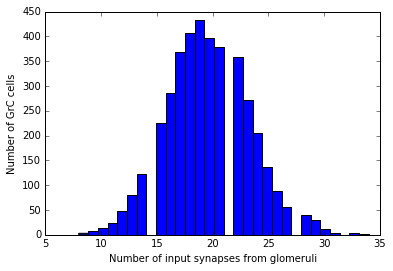

In [4]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
cell_number = simulation.cerebellum.layer_map['grclayer'].number_of_neurons
import numpy
number_of_inputs = numpy.bincount(target_cell_index)
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(number_of_inputs, bins=30)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of input synapses from glomeruli')
